# 진료내역정보
데이터 출처 : https://www.data.go.kr/dataset/15007115/fileData.do

* 진료내역정보는 2002년부터 2013년까지의 국민건강보험 가입자 중 요양기관(병/의원 등)으로부터의 진료이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 진료내역(진료과목코드, 주상병코드, 요양일수, 총처방일수 등)으로 구성된 개방데이터이다.

* 공공데이터 개방서비스( http://nhiss.nhis.or.kr/op/it/index.do )에서도 다운로드 받을 수 있음.


<img src="https://i.imgur.com/Bl0jZSh.png">

<img src="https://i.imgur.com/CnVui44.png">

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
set_matplotlib_formats('retina')

# 주피터 노트북에서 그래프 표시
%matplotlib inline

In [3]:
df = pd.read_csv("data/NHIS/국민건강보험공단_진료내역정보_2017.csv", encoding="euc-kr")
df.shape

(12568532, 19)

In [4]:
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2017,1,4661608,1,5,11,20170316,3,13,J060,R51,1,1,0.15,16420,4900,11520,3,20181126
1,2017,1,14468123,1,5,11,20170123,3,1,R51,K297,1,1,0.15,16420,4900,11520,3,20181126
2,2017,1,22980223,1,5,11,20170404,3,13,J0190,J060,1,1,0.15,14650,4300,10350,3,20181126
3,2017,1,23050697,1,5,11,20170407,3,13,J0190,J060,1,1,0.15,10620,3100,7520,3,20181126
4,2017,1,29517148,1,5,11,20170516,3,14,L309,L301,1,1,0.15,21760,6500,15260,7,20181126


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12568532 entries, 0 to 12568531
Data columns (total 19 columns):
기준년도          int64
가입자 일련번호      int64
진료내역일련번호      int64
성별코드          int64
연령대코드         int64
시도코드          int64
요양개시일자        int64
서식코드          int64
진료과목코드        int64
주상병코드         object
부상병코드         object
요양일수          int64
입내원일수         int64
심결가산율         float64
심결요양급여비용총액    int64
심결본인부담금       int64
심결보험자부담금      int64
총처방일수         int64
데이터 기준일자      int64
dtypes: float64(1), int64(16), object(2)
memory usage: 1.8+ GB


In [6]:
df = df.drop(["데이터 기준일자"], axis=1)
df.shape

(12568532, 18)

In [7]:
df["가입자 일련번호"].nunique()

1000000

In [8]:
df["진료내역일련번호"].nunique()

12568532

## 가입자별 진료내역 수
* 한 해동안 가입자 별로 진료내역 수

In [9]:
df_num_count = df["가입자 일련번호"].value_counts()

In [10]:
# 가입자별 진료 수를 다시 집계
# 평균 12 회의 진료를 받으며, 중앙값은 16회이다.
df_num_count.describe()

count    1000000.000000
mean          12.568532
std           15.578168
min            1.000000
25%            3.000000
50%            8.000000
75%           16.000000
max          503.000000
Name: 가입자 일련번호, dtype: float64

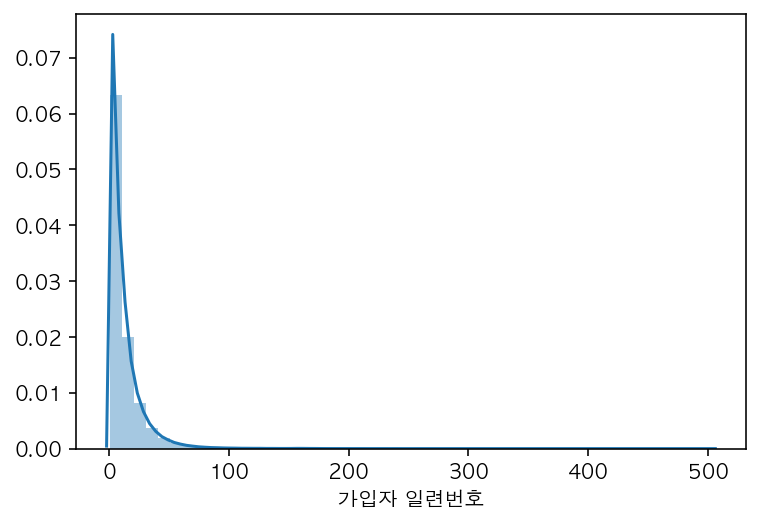

In [11]:
# 가입자별 진료내역 수 분포
sns.distplot(df_num_count)

## 서식코드
* 명세서 서식 구분을 위한 코드

In [17]:
form_cd = {2: "의과 입원", 3: "의과 외래", 8: "보건기관 외래"}

In [ ]:
form_cd_count = df["서식코드"].value_counts()
form_cd_count = form_cd_count.reset_index()
form_cd_count.columns = ["서식코드", "내역수"]

In [23]:
form_cd_count["서식명"] = form_cd_count["서식코드"].map(form_cd)

In [24]:
form_cd_count

,서식코드,내역수,서식명
0,3,12219627,의과 외래
1,2,273271,의과 입원
2,8,75634,보건기관 외래


## 시도코드

In [27]:
sido_cd = {11 : "서울특별시",
26: "부산광역시",
27: "대구광역시",
28: "인천광역시",
29: "광주광역시",
30: "대전광역시",
31: "울산광역시",
36: "세종특별자치시",
41: "경기도",
42: "강원도",
43: "충청북도",
44: "충청남도",
45: "전라북도",
46: "전라남도",
47: "경상북도",
48: "경상남도",
49: "제주특별자치도"}

{11: '서울특별시',
 26: '부산광역시',
 27: '대구광역시',
 28: '인천광역시',
 29: '광주광역시',
 30: '대전광역시',
 31: '울산광역시',
 36: '세종특별자치시',
 41: '경기도',
 42: '강원도',
 43: '충청북도',
 44: '충청남도',
 45: '전라북도',
 46: '전라남도',
 47: '경상북도',
 48: '경상남도',
 49: '제주특별자치도'}

In [31]:
sido_count = df["시도코드"].value_counts().reset_index()
sido_count.columns = ["시도코드", "내역수"]
sido_count["시도명"] = sido_count["시도코드"].map(sido_cd)
sido_count

,시도코드,내역수,시도명
0,41,2948775,경기도
1,11,2267485,서울특별시
2,26,884294,부산광역시
3,48,832592,경상남도
4,28,694357,인천광역시
5,47,692769,경상북도
6,27,604713,대구광역시
7,44,568025,충청남도
8,46,546262,전라남도
9,45,539160,전라북도


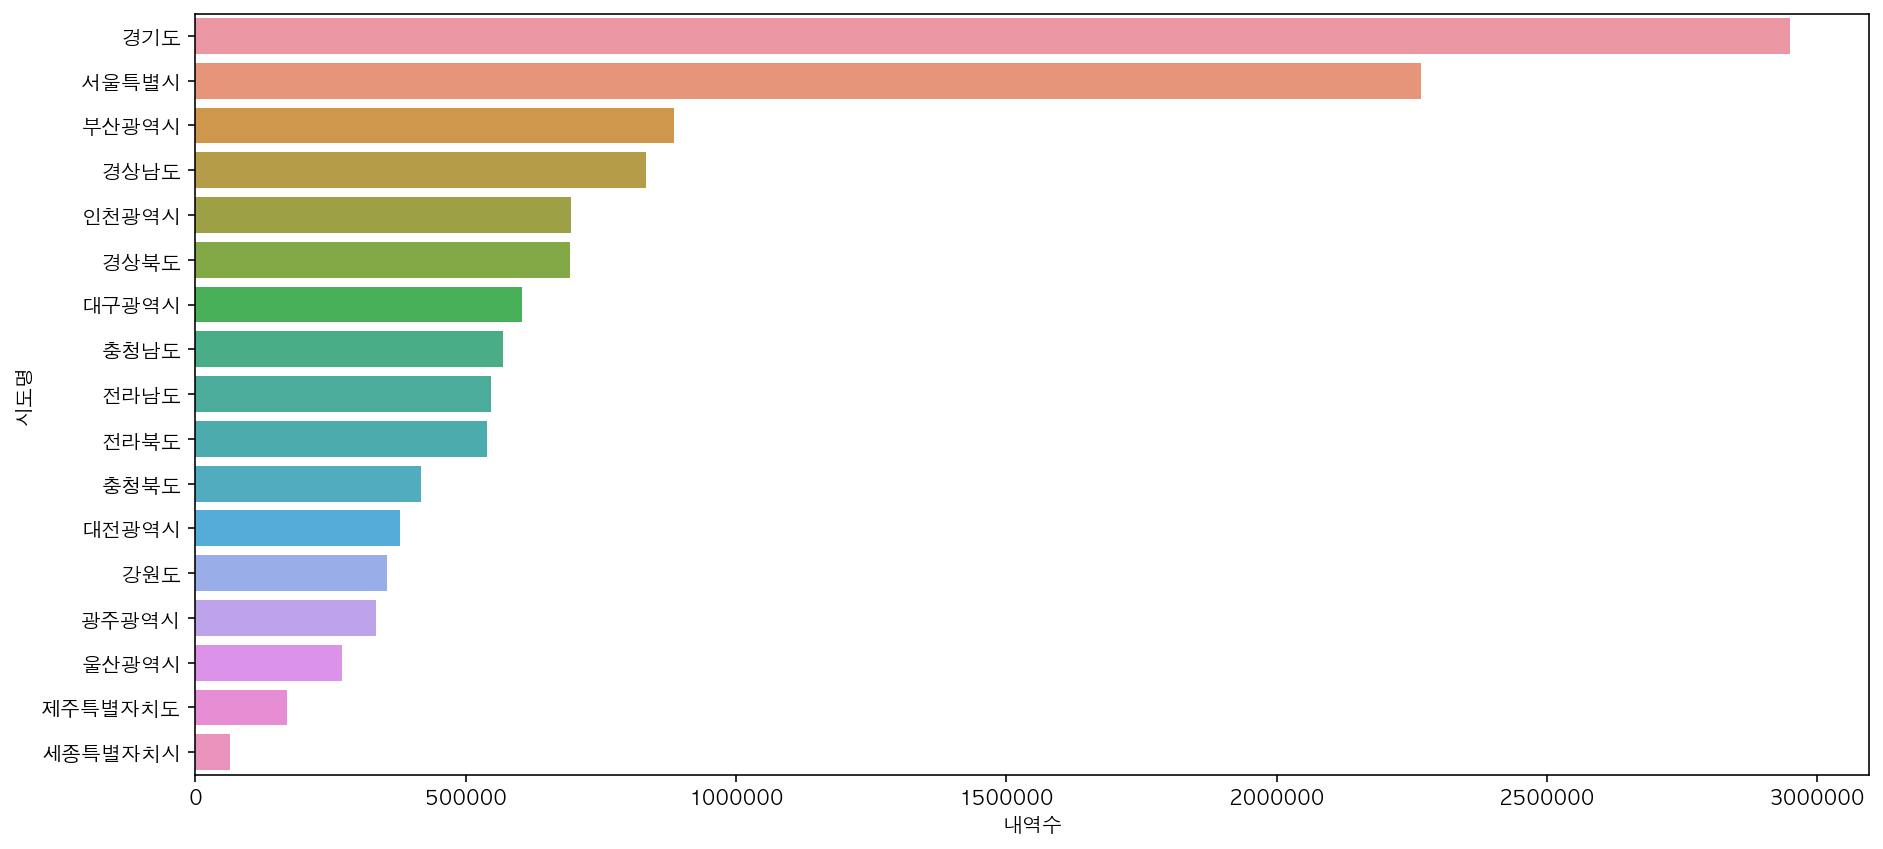

In [40]:
plt.figure(figsize=(15, 7))
sns.barplot(data=sido_count, y="시도명", x="내역수")

## 요양개시일자

In [41]:
df["요양개시일자"].head()

0    20170316
1    20170123
2    20170404
3    20170407
4    20170516
Name: 요양개시일자, dtype: int64

In [51]:
# 숫자 형태의 데이터는 날짜를 timestamp로 봅니다.
# 따라서 날짜형태로 타입변경을 위해 str 타입으로 변경합니다.
df["요양개시일자"] = df["요양개시일자"].astype(str)
df["요양개시일자"] = pd.to_datetime(df["요양개시일자"])

In [66]:
day_count = df["요양개시일자"].value_counts().reset_index()
day_count.columns = ["요양개시일자", "내역수"]
day_count = day_count.sort_values(by="요양개시일자")
day_count.head()

,요양개시일자,내역수
302,2017-01-01,10296
10,2017-01-02,55818
84,2017-01-03,44014
115,2017-01-04,42015
135,2017-01-05,41273


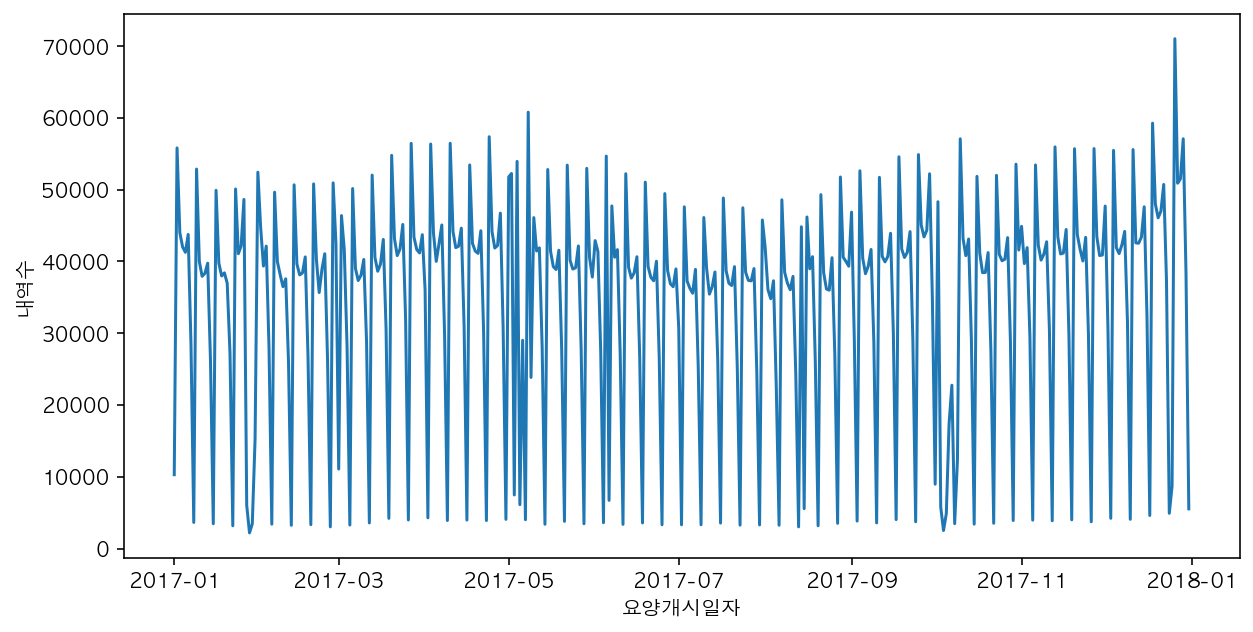

In [64]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=day_count, x="요양개시일자", y="내역수")

In [67]:
df["요양개시월"] = df["요양개시일자"].dt.month

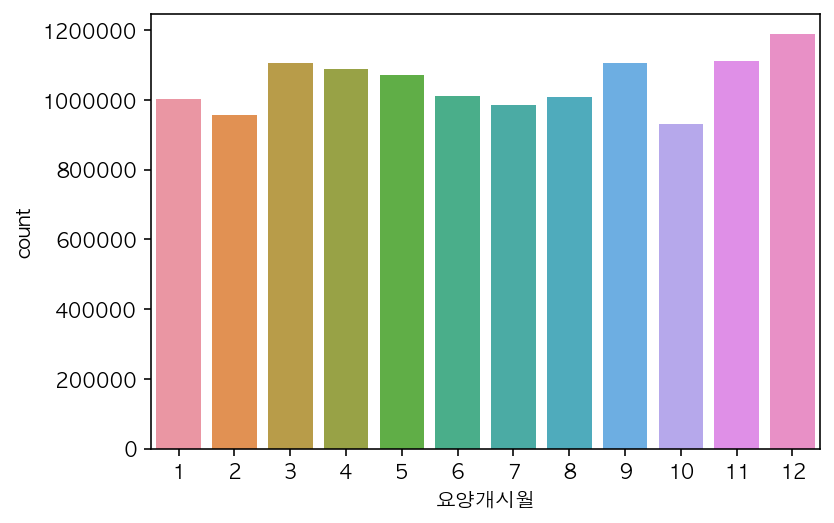

In [68]:
sns.countplot(data=df, x="요양개시월")

In [74]:
df["요양개시요일"] = df["요양개시일자"].dt.dayofweek

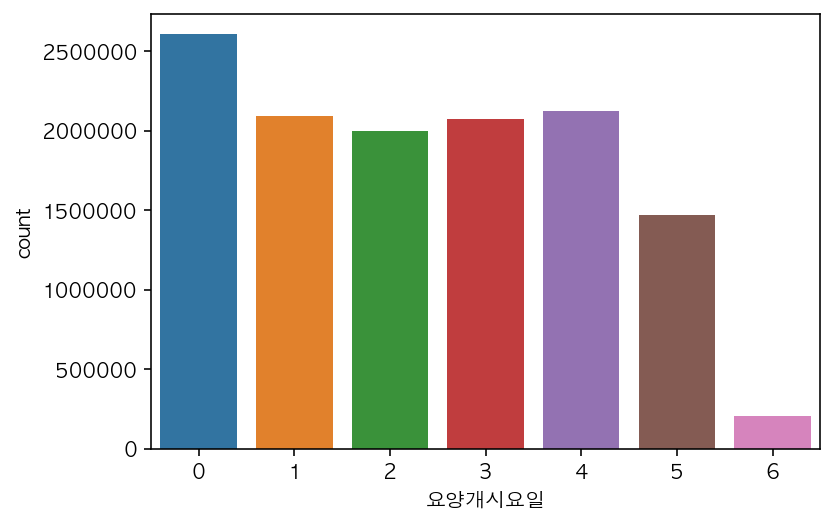

In [75]:
sns.countplot(data=df, x="요양개시요일")

## 주상병코드
* 한국표준 질병·사인 분류 : http://www.koicd.kr/2016/owlsearch/all.do

In [82]:
koicd = {
"J20.9" : "상세불명의 급성 기관지염",
"I10.9" : "기타 및 상세불명의 원발성 고혈압",
"E11.9" : "합병증을 동반하지 않은 2형 당뇨병",
"J03.90" : "재발성으로 명시되어 있지 않은 상세불명의 급성 편도염",
"J02.9" : "상세불명의 급성 인두염"}

In [77]:
df["주상병코드"].value_counts()

J209      1103359
I109       680425
F_         334665
N_         212523
E119       202139
J0390      197887
J304       193619
J029       171936
M170       155910
J00        145067
M4806      135928
J060       119770
K210       117835
M5456      117633
M511       114374
J0190      111801
N185       106717
J40        105838
L239       105378
J069        91444
J303        90758
J040        82576
B_          79068
H0411       76823
S3350       75450
A099        71323
J219        70697
K219        68473
A090        65879
J_          65683
           ...   
H702            1
S36802          1
G91             1
S36301          1
K5783           1
Z581            1
K025            1
S3231           1
S6520           1
M9421           1
M058            1
M0737           1
S40             1
Z752            1
R771            1
Q778            1
M4158           1
D486            1
K430            1
E1200           1
Z574            1
S02430          1
D12             1
J173            1
S42281    

In [93]:
month_koicd = df.groupby(["요양개시월", "주상병코드"])["서식코드"].count().reset_index()
month_koicd.columns = ["요양개시월", "주상병코드", "내역수"]

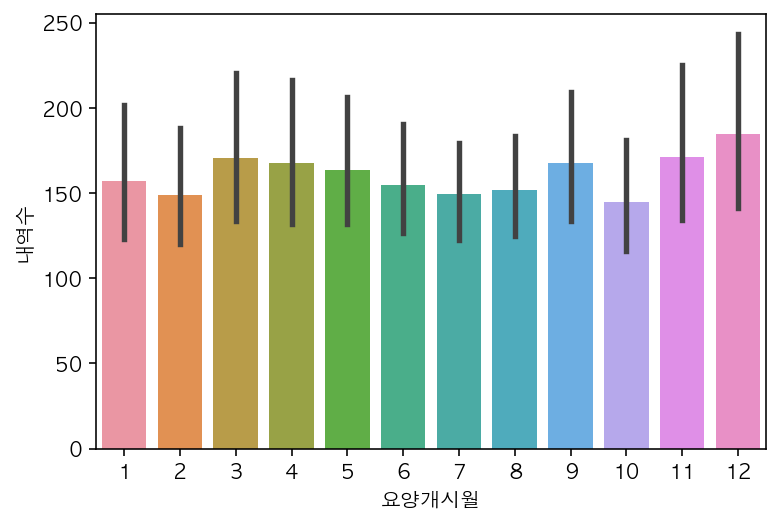

In [94]:
sns.barplot(data=month_koicd, x="요양개시월", y="내역수")

In [100]:
print(koicd["J20.9"])
J209 = df[df["주상병코드"] == "J209"]
J209.shape

상세불명의 급성 기관지염


(1103359, 20)

상세불명의 급성 기관지염 질병의 월별 내역수


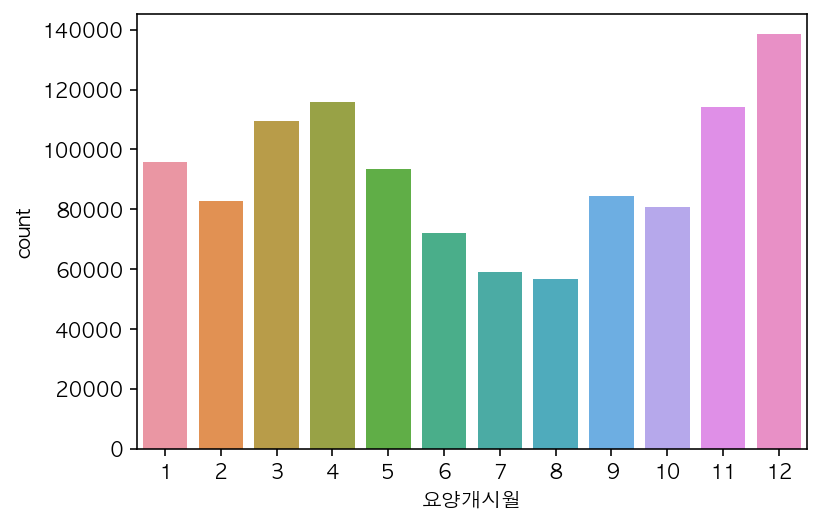

In [103]:
# 여름에는 내역수가 적고 환절기와 겨울철에 많아짐을 확인할 수 있다.
print(koicd["J20.9"], "질병의 월별 내역수")
sns.countplot(data=J209, x="요양개시월")